# <u> Assignment - Programming with R and Python </u>

#### 2. You use a web api to collect data from the Spotify app database, from this Spotify dataset, perform the following tasks:

   * <font size="3">Visualize the distribution of a numerical variable ‘song_duration’.</font>
   * <font size="3">Add a layer of smooth density curve to the above plot.</font>
   * <font size="3">Differentiate the plot based on the categorial variable ‘song_genre’ using different colors.</font>

#### Evaluation Rubrics:
| Parameter | Marks |
|---------- | --------- |
| Use of histogram | 1 |
| Density layer | 1 |
| Color coding | 2 |

#

# Approach:1.1 - with python (using CSV file)

In [19]:
# Importing the necessary libraries for data manipulation, analysis and visualization 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

######

In [34]:
# Reading the data from the CSV file

file_path = r'C:\Users\Lenovo\Downloads\spotify.csv'
spotify_df = pd.read_csv(file_path)

######

In [35]:
# Updating the column name of 'duration_ms' for song duration and 'track_genre' for song genre as per assignment terminology 
 
spotify_df.rename(columns={'duration_ms': 'song_duration', 'track_genre': 'song_genre'}, inplace=True)

######

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24516\148745765.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Song Genre', bbox_to_anchor=(1.05, 1), loc='upper left')


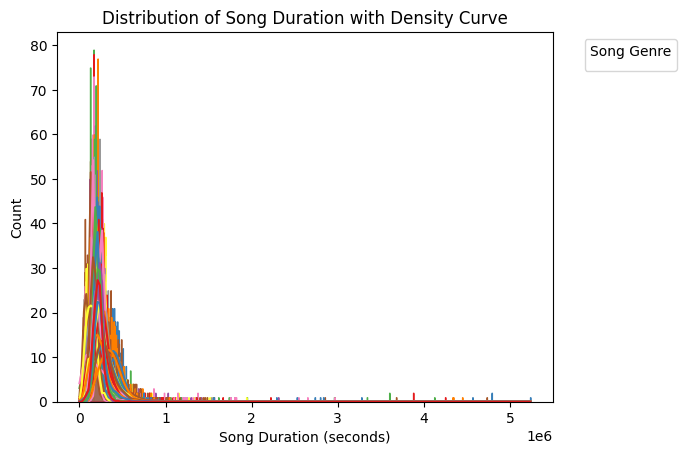

In [28]:
# Filtering out genres with fewer than 2 data points

filtered_spotify_df = spotify_df.groupby('song_genre').filter(lambda x: len(x) > 1)


# Creating a color palette with enough distinct colors

num_genres = filtered_spotify_df['song_genre'].nunique()
palette = sns.color_palette("Set1", num_genres)


# Creating the plot and Histogram with density plot

plt.figure(figsize=(12, 6))

sns.histplot(data=filtered_spotify_df, x='song_duration', hue='song_genre', kde=True, element='step', palette=palette)

plt.title('Distribution of Song Duration with Density Curve')
plt.xlabel('Song Duration (seconds)')
plt.ylabel('Count')
plt.legend(title='Song Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


######

######

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24516\551907303.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Song Genre', bbox_to_anchor=(1.05, 1), loc='upper left')


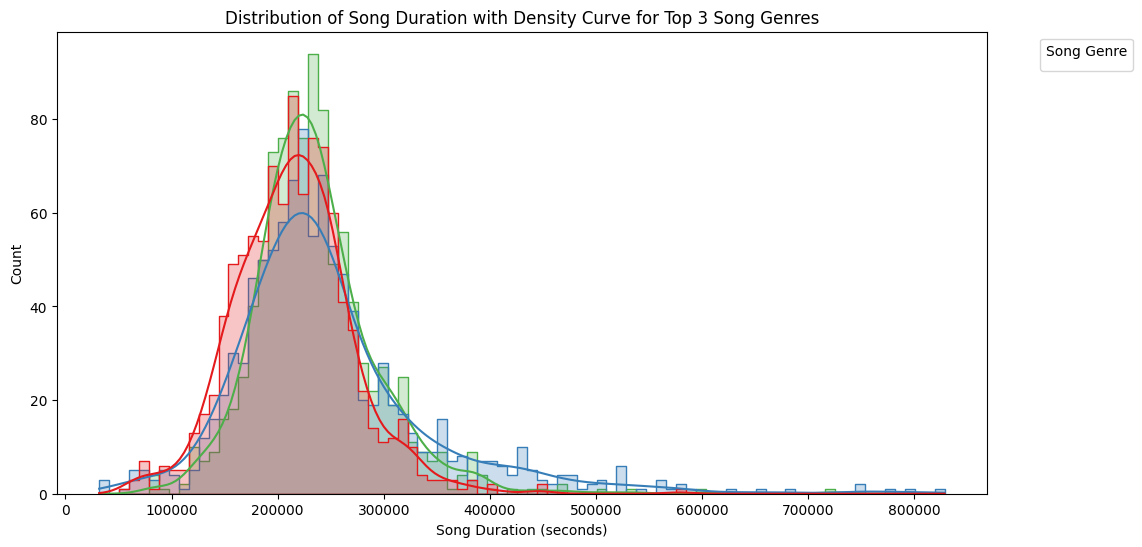

In [30]:
# Identify the top 3 song genres based on the number of songs

top_genres = filtered_spotify_df['song_genre'].value_counts().nlargest(3).index
top_genres_df = filtered_spotify_df[filtered_spotify_df['song_genre'].isin(top_genres)]


# Create a color palette with enough distinct colors

num_genres = top_genres_df['song_genre'].nunique()
palette = sns.color_palette("Set1", num_genres)


# Creating the plot and Histogram with density plot

plt.figure(figsize=(12, 6))

sns.histplot(data=top_genres_df, x='song_duration', hue='song_genre', kde=True, element='step', palette=palette)

plt.title('Distribution of Song Duration with Density Curve for Top 3 Song Genres')
plt.xlabel('Song Duration (seconds)')
plt.ylabel('Count')
plt.legend(title='Song Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()